<a href="https://colab.research.google.com/github/AkshayAI007/Credit-Card-default-Prediction-using-ML/blob/main/Credit_Card_default_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**    - Credit_Card_default_prediction_using_ML



##### **Project Type**    - Supervised Classification


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/AkshayAI007/Credit-Card-default-Prediction-using-ML.git

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-148aa317efa6>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
# Mounting The Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [3]:
import pandas as pd

# Load Dataset from Excel
path = '/content/drive/MyDrive/CreditCard Default Prediction/default of credit card clients.xls'
df = pd.read_excel(path, header=1)


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
#check for null values in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

0

The dataset does not contain any null or duplicate values

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description

#History of past payment:

I tracked the past monthly payment records from April to September 2005. The measurement scale for the repayment status is as follows:

PAY_0: Payment received in September 2005

PAY_2: Payment received in August 2005

PAY_3: Payment received in July 2005

PAY_4: Payment received in June 2005

PAY_5: Payment received in May 2005

PAY_6: Payment received in April 2005

##Amount of bill statement (NT dollar):

BILL_AMT1: Amount of bill statement in September 2005

BILL_AMT2: Amount of bill statement in August 2005

BILL_AMT3: Amount of bill statement in July 2005

BILL_AMT4: Amount of bill statement in June 2005

BILL_AMT5: Amount of bill statement in May 2005

BILL_AMT6: Amount of bill statement in April 2005

##Amount of previous payment (NT dollar):

PAY_AMT1: Amount of previous payment in September 2005

PAY_AMT2: Amount of previous payment in August 2005

PAY_AMT3: Amount of previous payment in July 2005

PAY_AMT4: Amount of previous payment in June 2005

PAY_AMT5: Amount of previous payment in May 2005

PAY_AMT6: Amount of previous payment in April 2005

##Default payment next month:

default.payment.next.month: Default payment (1 = yes, 0 = no)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [12]:
#check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### What all manipulations have you done and insights you found?

Dealing with catagorical variables requires careful consideration of the method applied to avoid multicolinearity in the dataset. Hence, using Label encoding, the catagorical variables are converted into differen catagories.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***





###1. What is the overall default rate in the dataset? How does it vary across different months?

Overall default rate: 0.2212


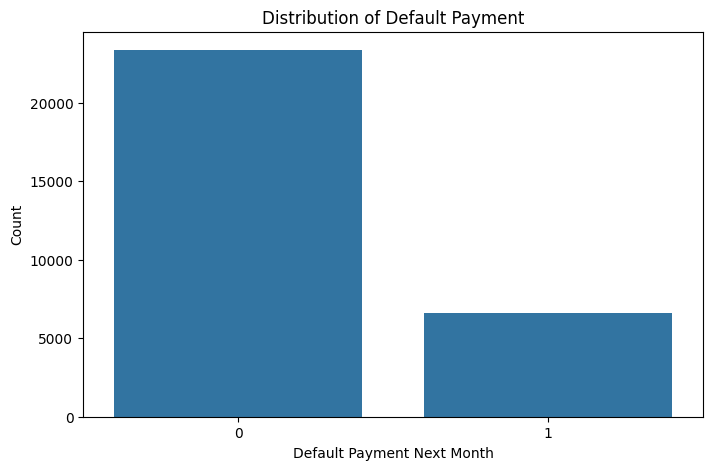

In [13]:
default_rate = df['default payment next month'].mean()
print("Overall default rate:", default_rate)

# Visual representation
plt.figure(figsize=(8, 5))
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.show()

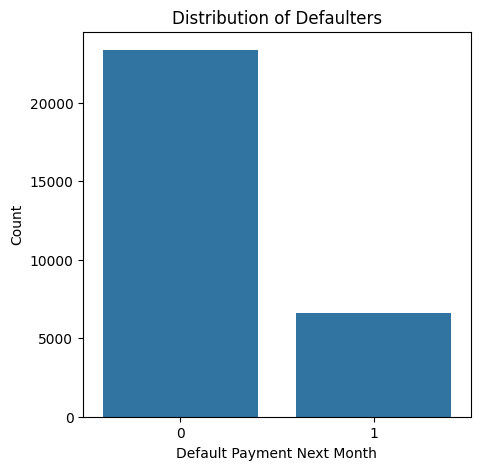

In [14]:

# Values count plot of default.payment.next.month
plt.figure(figsize=(5,5))
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Defaulters')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##2.Is there any correlation between the repayment status and the likelihood of default in the next month?

Correlation between repayment status and default probability:
                               PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
PAY_0                       1.000000  0.672164  0.574245  0.538841  0.509426   
PAY_2                       0.672164  1.000000  0.766552  0.662067  0.622780   
PAY_3                       0.574245  0.766552  1.000000  0.777359  0.686775   
PAY_4                       0.538841  0.662067  0.777359  1.000000  0.819835   
PAY_5                       0.509426  0.622780  0.686775  0.819835  1.000000   
PAY_6                       0.474553  0.575501  0.632684  0.716449  0.816900   
default payment next month  0.324794  0.263551  0.235253  0.216614  0.204149   

                               PAY_6  default payment next month  
PAY_0                       0.474553                    0.324794  
PAY_2                       0.575501                    0.263551  
PAY_3                       0.632684                    0.235253  
PAY_4                       0

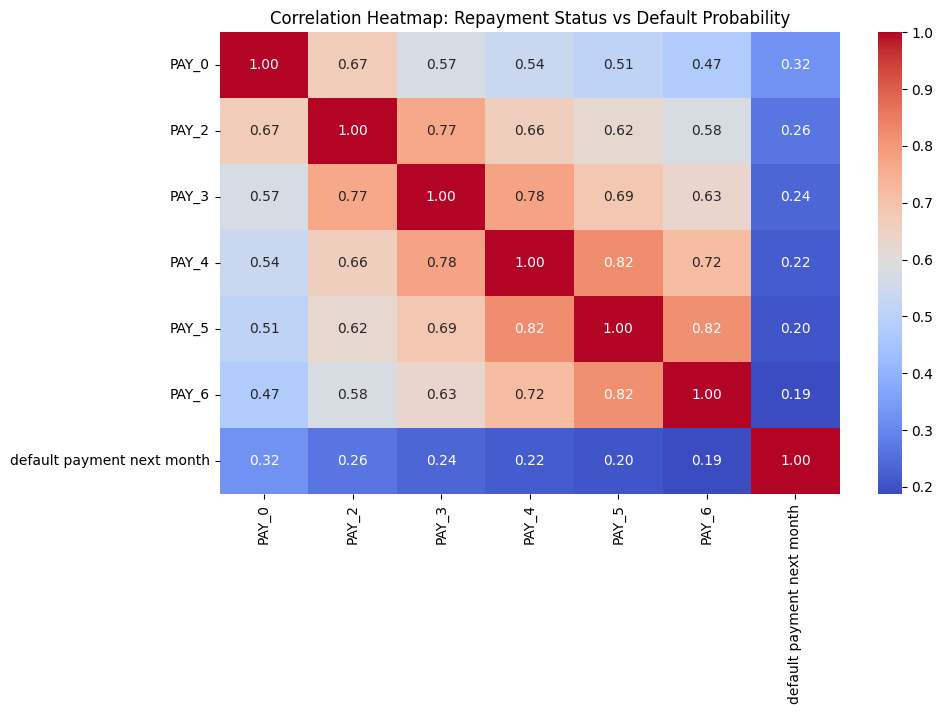

In [15]:
corr_repayment_default = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']].corr()
print("Correlation between repayment status and default probability:")
print(corr_repayment_default)

# Visual representation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_repayment_default, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Repayment Status vs Default Probability')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####3.How do the bill statement amounts vary across different months? Are there any trends or patterns?

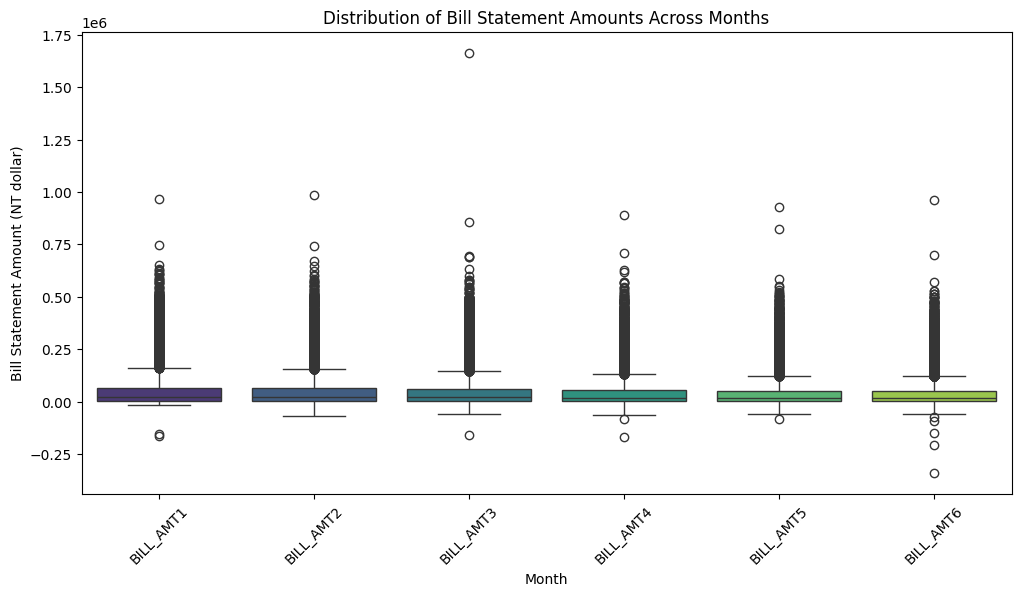

In [16]:
# Selecting bill statement columns
bill_statement_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Melting the dataframe for easier visualization
melted_bill_data = df.melt(value_vars=bill_statement_cols, var_name='Month', value_name='Bill_Amount')

# Visual representation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Bill_Amount', data=melted_bill_data, palette='viridis')
plt.title('Distribution of Bill Statement Amounts Across Months')
plt.xlabel('Month')
plt.ylabel('Bill Statement Amount (NT dollar)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


###4. What is the distribution of the previous payment amounts across the dataset? Are there any outliers or anomalies?

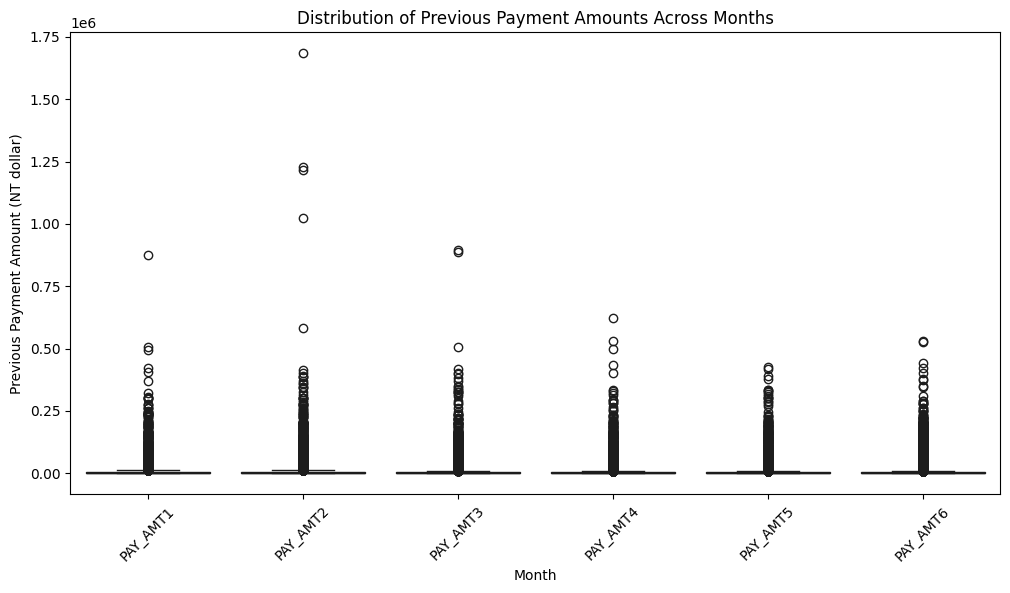

In [17]:

# Selecting previous payment columns
prev_payment_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Melting the dataframe for easier visualization
melted_prev_payment_data = df.melt(value_vars=prev_payment_cols, var_name='Month', value_name='Previous_Payment_Amount')

# Visual representation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Previous_Payment_Amount', data=melted_prev_payment_data, palette='magma')
plt.title('Distribution of Previous Payment Amounts Across Months')
plt.xlabel('Month')
plt.ylabel('Previous Payment Amount (NT dollar)')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###5.How does the amount of previous payment relate to the bill statement amounts in the respective months?


<Figure size 1200x600 with 0 Axes>

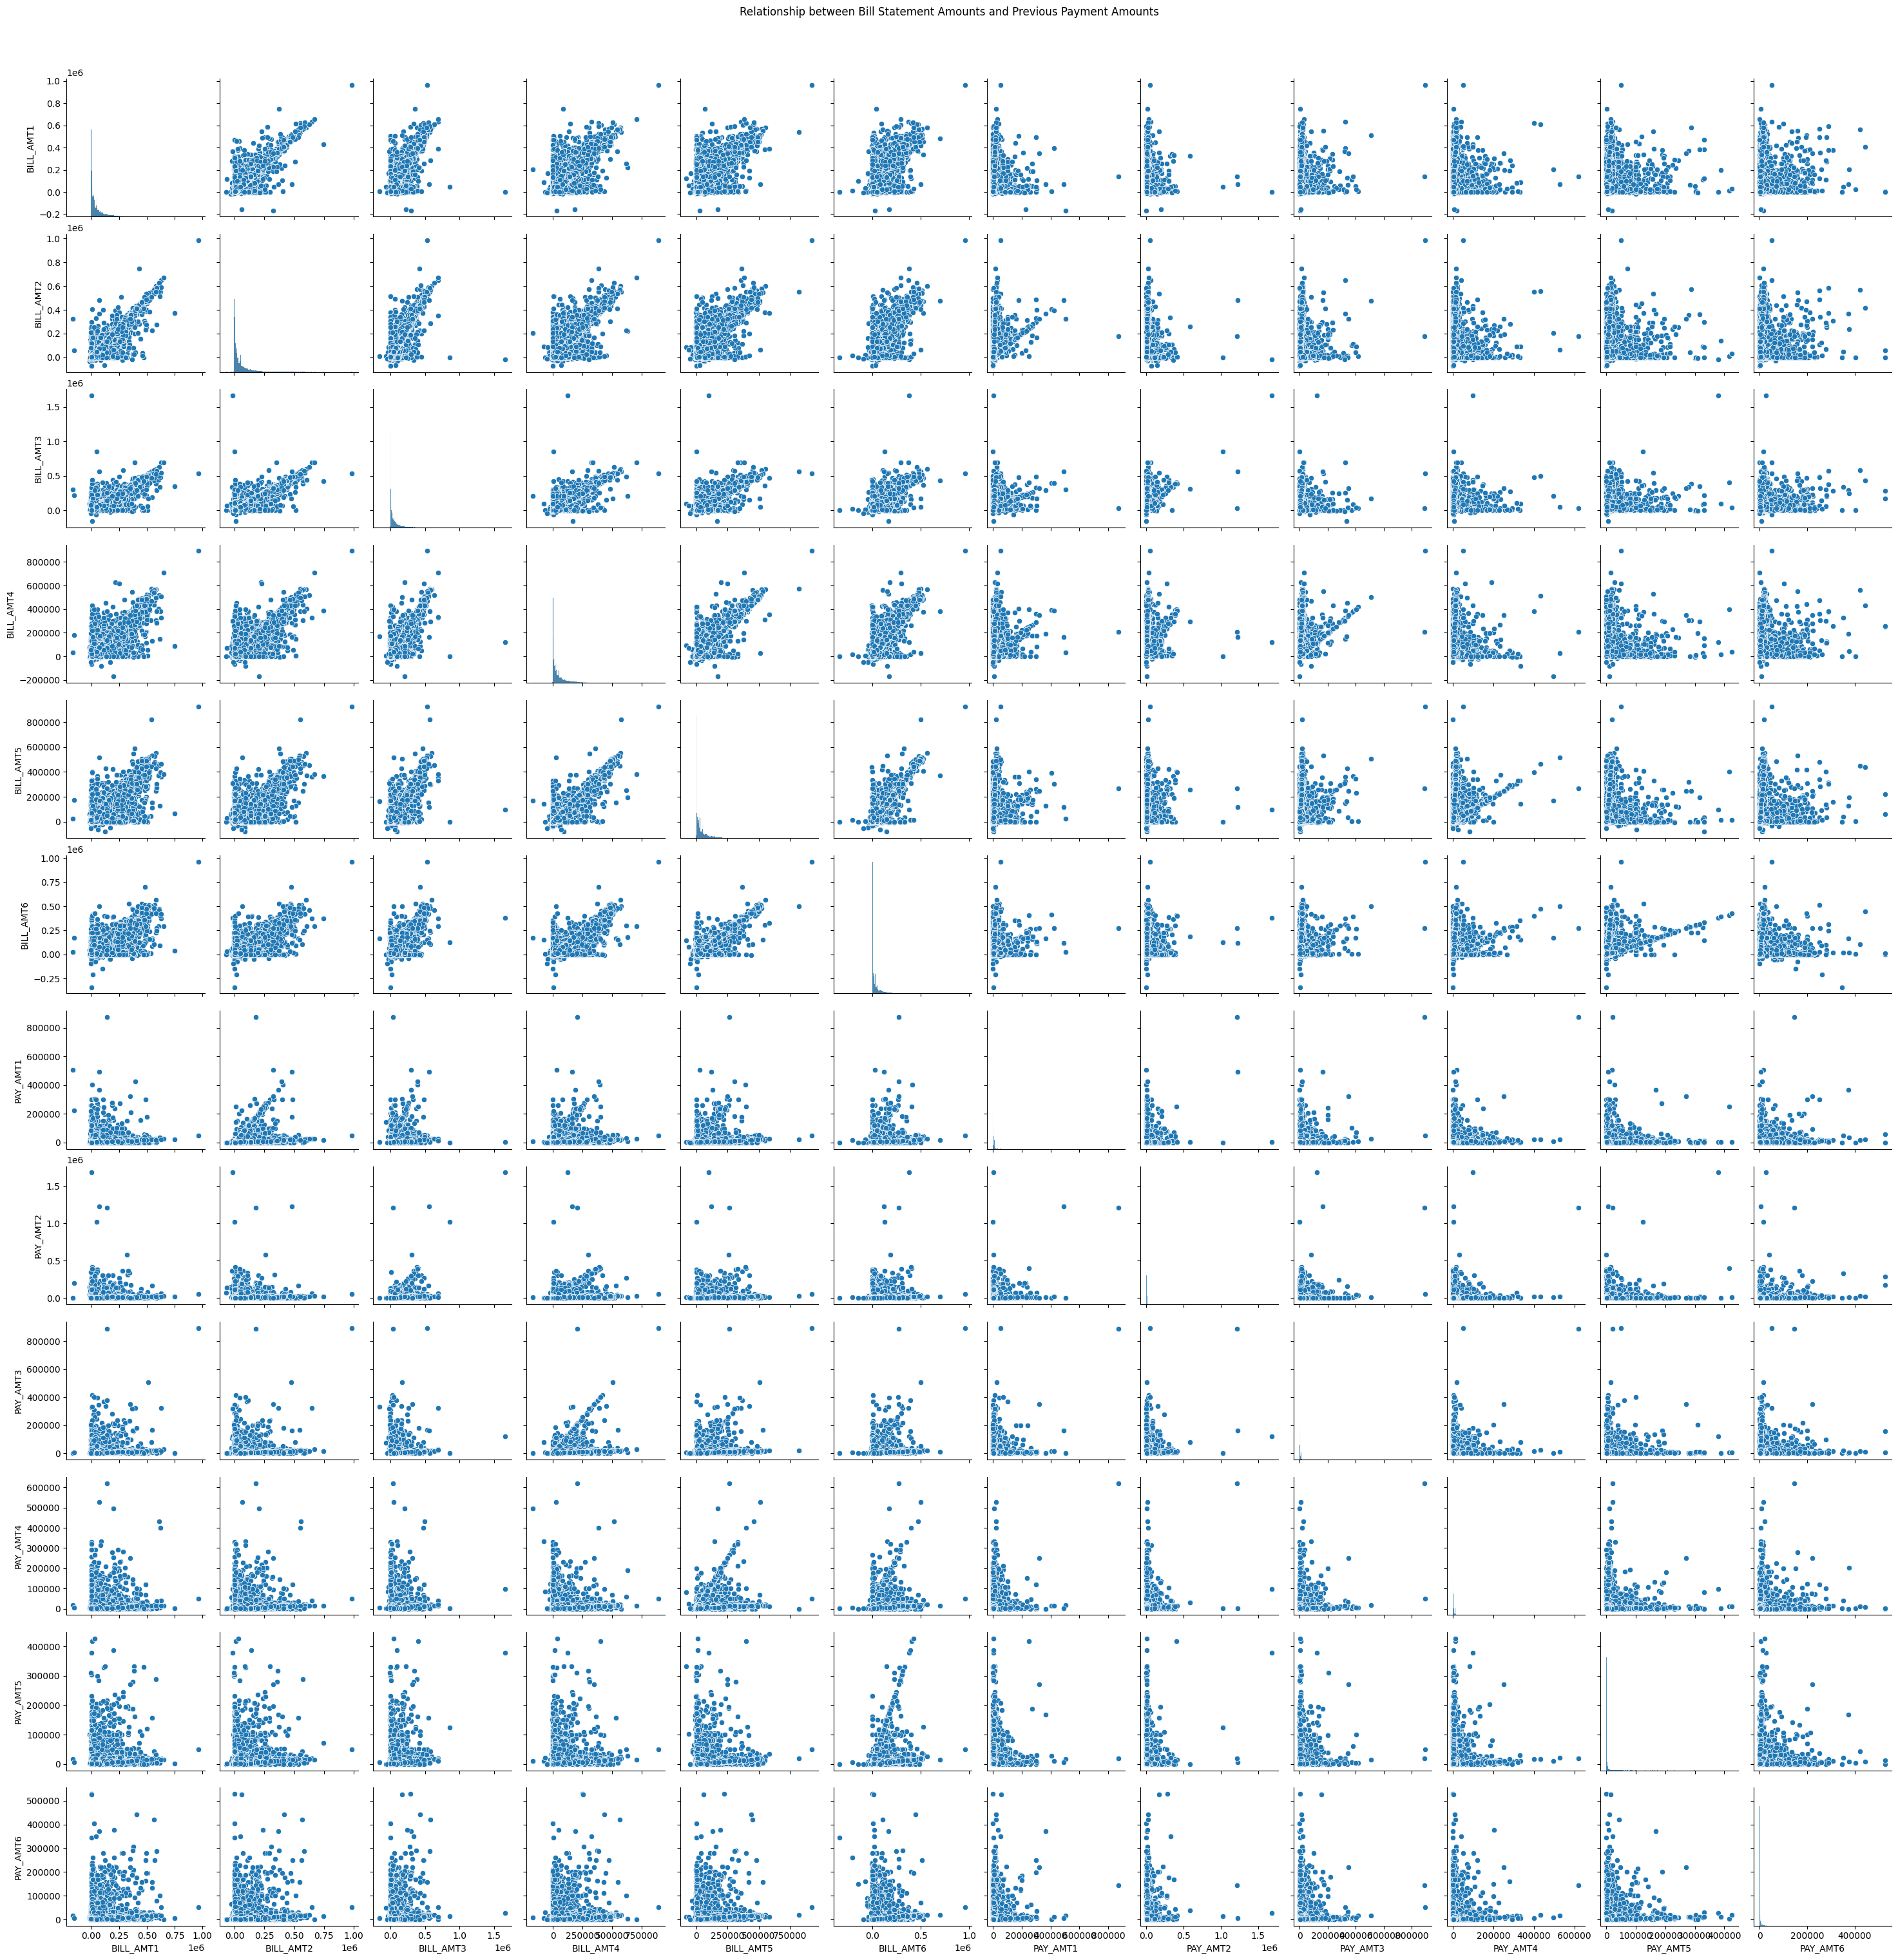

In [18]:
# Selecting bill statement and previous payment columns
payment_related_cols = bill_statement_cols + prev_payment_cols

# Visual representation
plt.figure(figsize=(12, 6))
sns.pairplot(df[payment_related_cols])
plt.suptitle('Relationship between Bill Statement Amounts and Previous Payment Amounts', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pairplot above illustrates the relationship between bill statement amounts and previous payment amounts in the respective months. Each scatter plot shows the correlation or lack thereof between these variables, providing insights into potential patterns or trends in payment behavior.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###6. Are there any significant differences in bill statement amounts between customers who defaulted and those who did not?


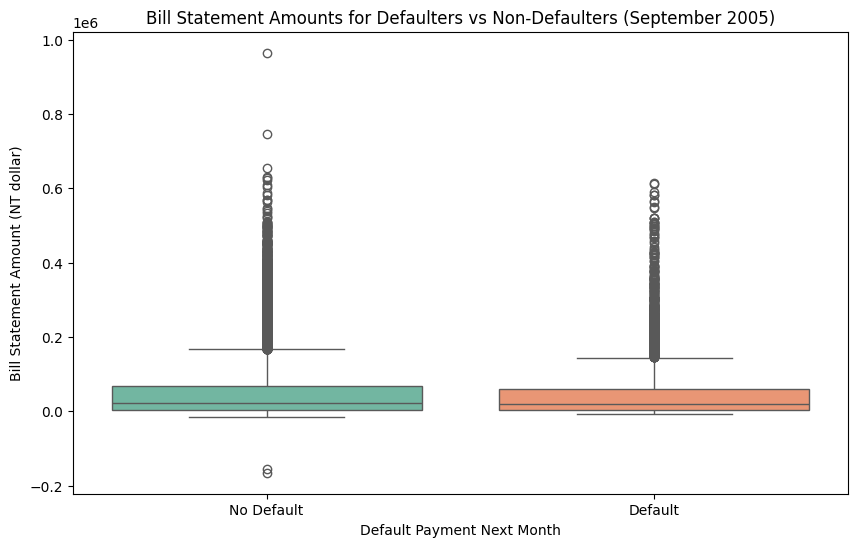

In [19]:
# Visual representation
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='BILL_AMT1', data=df, palette='Set2')
plt.title('Bill Statement Amounts for Defaulters vs Non-Defaulters (September 2005)')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Bill Statement Amount (NT dollar)')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()


##### 1. Why did you pick the specific chart?

The boxplot above compares the distribution of bill statement amounts for customers who defaulted and those who did not in September 2005. It helps identify any significant differences in bill statement amounts between defaulters and non-defaulters, which could indicate potential predictive power for default risk assessment.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###7. How do the distributions of bill statement amounts differ across customers who defaulted and those who did not?


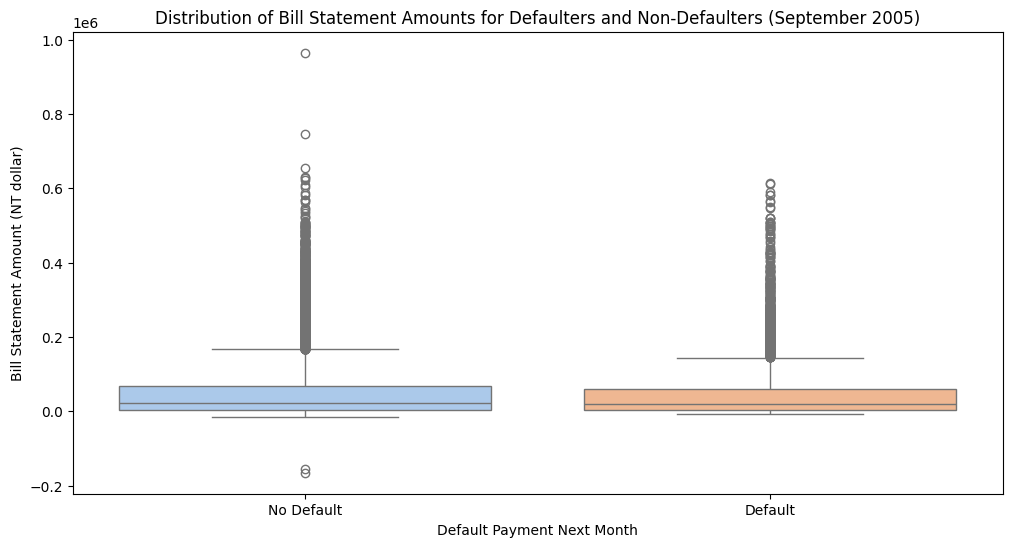

In [20]:
# Chart - 7 visualization code
# Visual representation
plt.figure(figsize=(12, 6))
sns.boxplot(x='default payment next month', y='BILL_AMT1', data=df, palette='pastel')
plt.title('Distribution of Bill Statement Amounts for Defaulters and Non-Defaulters (September 2005)')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Bill Statement Amount (NT dollar)')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot above showcases the distribution of bill statement amounts for customers who defaulted and those who did not in September 2005. It offers a clear visual comparison between the two groups, highlighting any disparities in their bill statement amounts and potential differences in financial behavior.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###8. Is there any seasonality in the default behavior based on the payment history and bill statement amounts across the months?


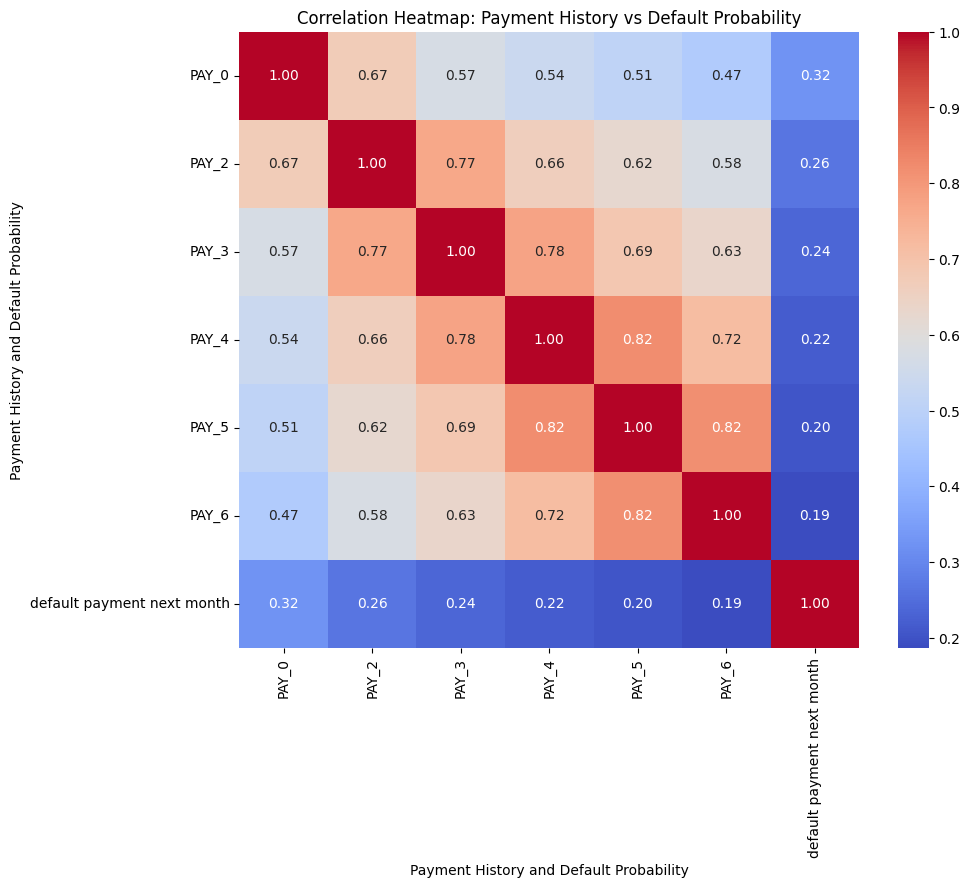

In [21]:
# Selecting relevant columns for correlation analysis
relevant_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']
relevant_data = df[relevant_cols]

# Calculating correlation matrix
correlation_matrix = relevant_data.corr()

# Visual representation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Payment History vs Default Probability')
plt.xlabel('Payment History and Default Probability')
plt.ylabel('Payment History and Default Probability')
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap above depicts the correlation between payment history (from April to September) and the likelihood of default in the next month. It helps identify any potential seasonality or patterns in default behavior based on payment history across the months.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###9.Can we identify any specific patterns or trends in the payment behavior of customers who defaulted compared to those who did not?


<Figure size 1000x600 with 0 Axes>

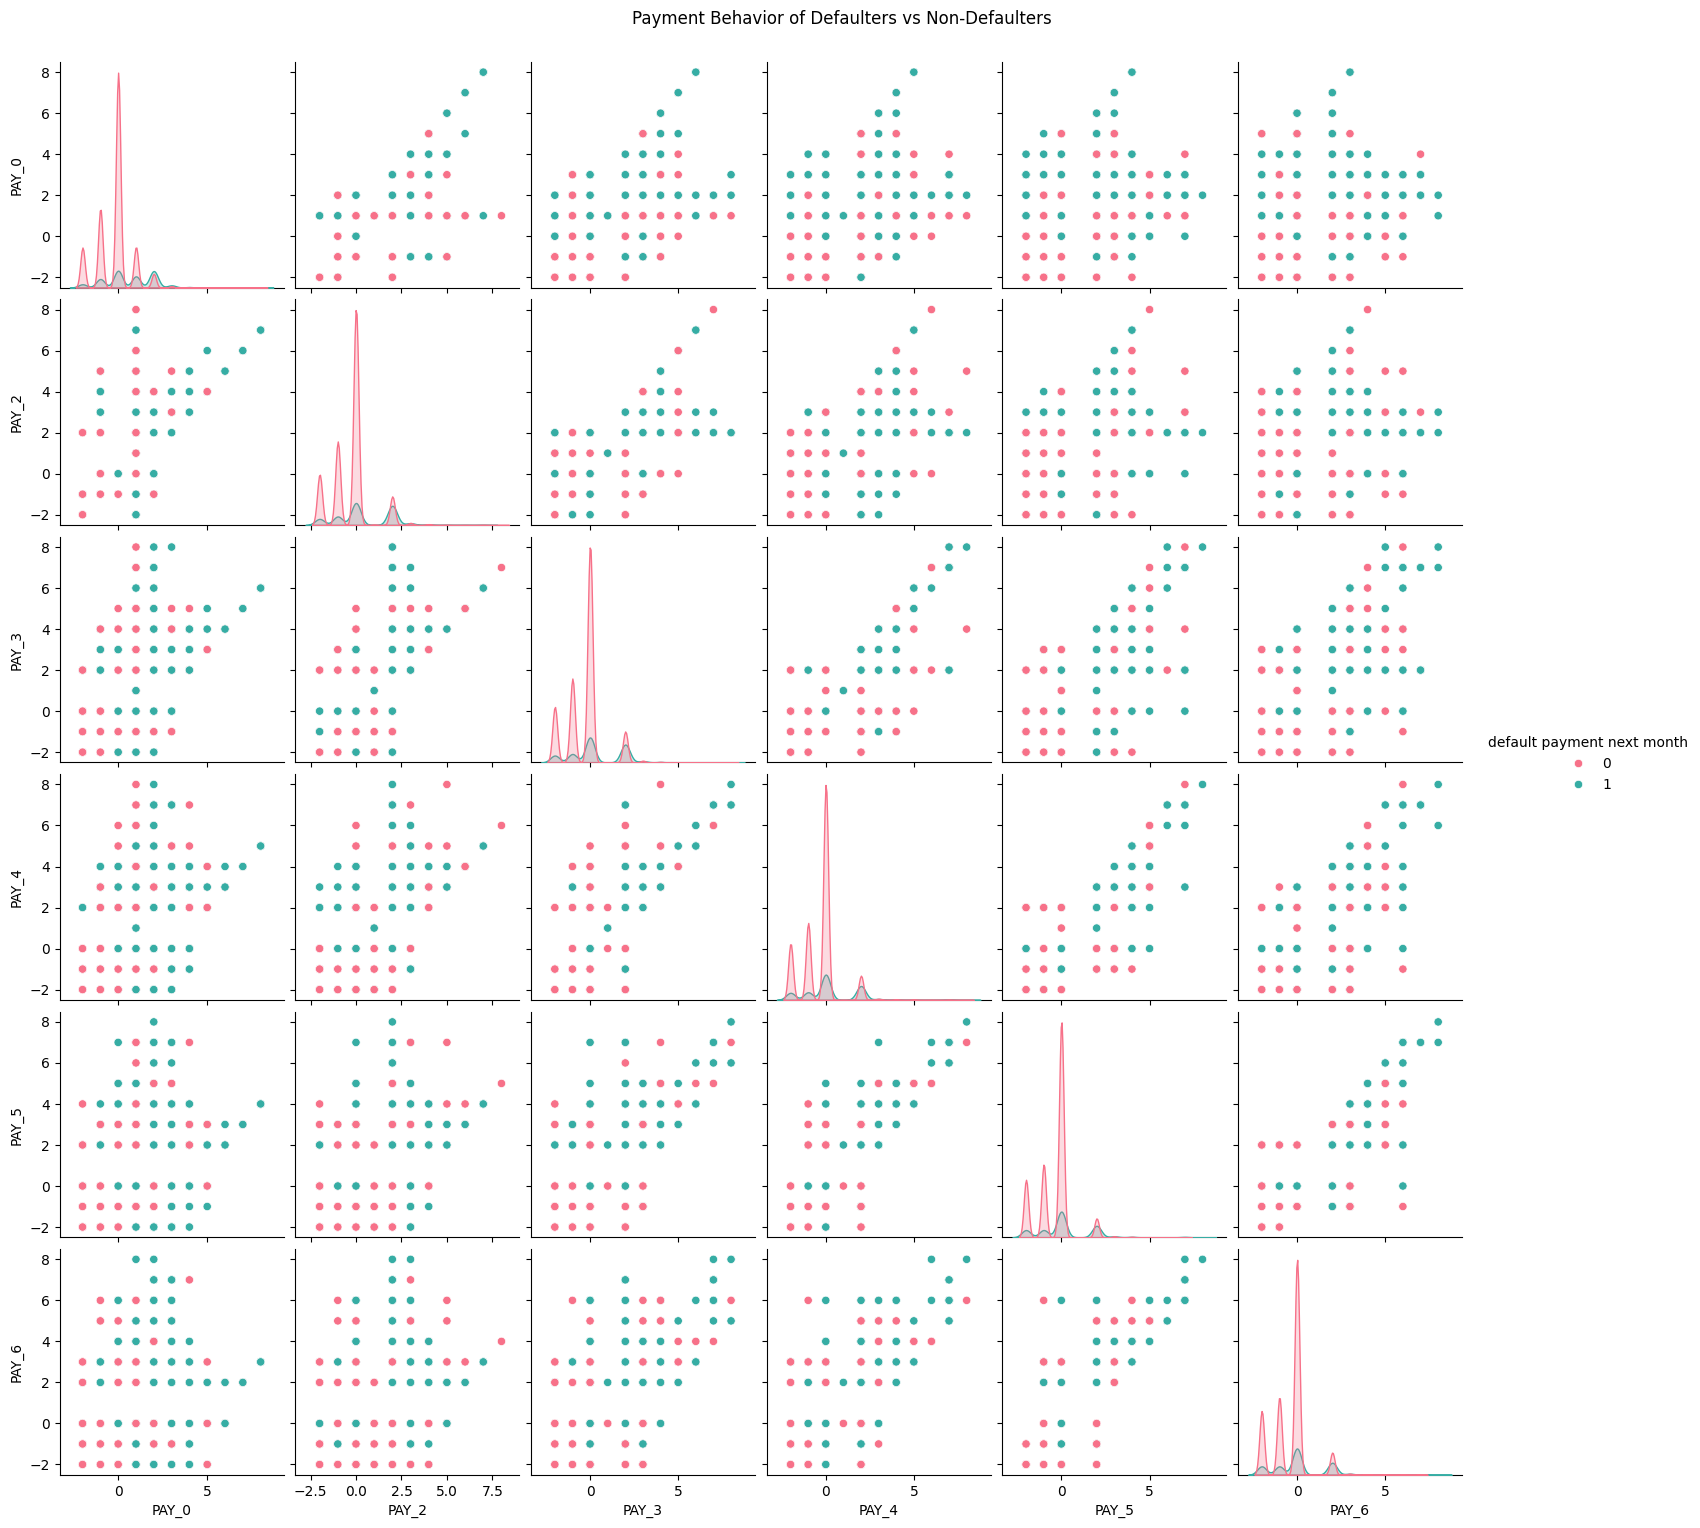

In [22]:
# Visual representation
plt.figure(figsize=(10, 6))
sns.pairplot(df, vars=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], hue='default payment next month', palette='husl')
plt.suptitle('Payment Behavior of Defaulters vs Non-Defaulters', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pairplot above compares the payment behavior (from April to September) of customers who defaulted and those who did not. Each scatter plot shows the relationship between payment status in a specific month and the likelihood of default in the next month, allowing for the identification of any specific patterns or trends in payment behavior associated with defaulting.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### 10.**Credit Utilization Analysis**: How does the utilization of credit limits vary among customers who defaulted compared to those who did not? Are there any patterns or trends in credit utilization that could indicate increased default risk?

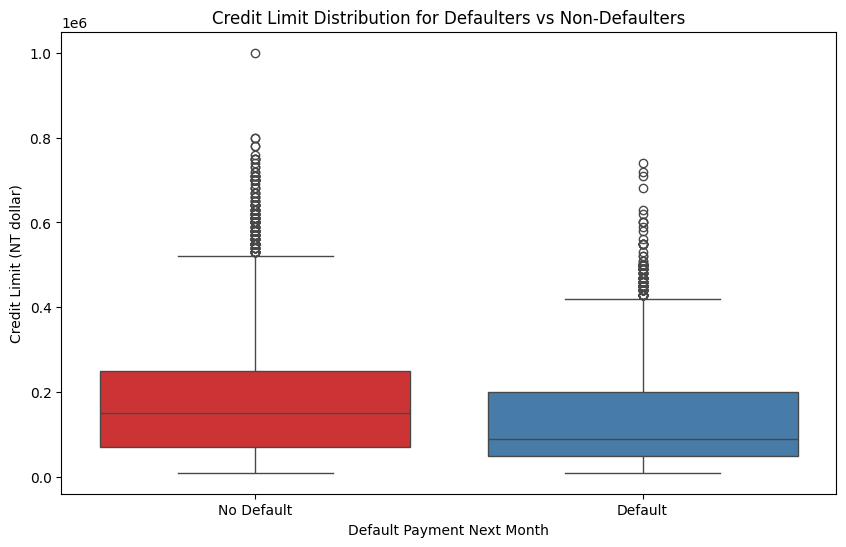

In [23]:
# Visual representation
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df, palette='Set1')
plt.title('Credit Limit Distribution for Defaulters vs Non-Defaulters')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Credit Limit (NT dollar)')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####11.**Impact of Marital Status on Default Probability**: Is there a significant difference in default probability between married and unmarried customers? Can we identify any marital status-related factors that contribute to default risk, such as financial dependence or stability?

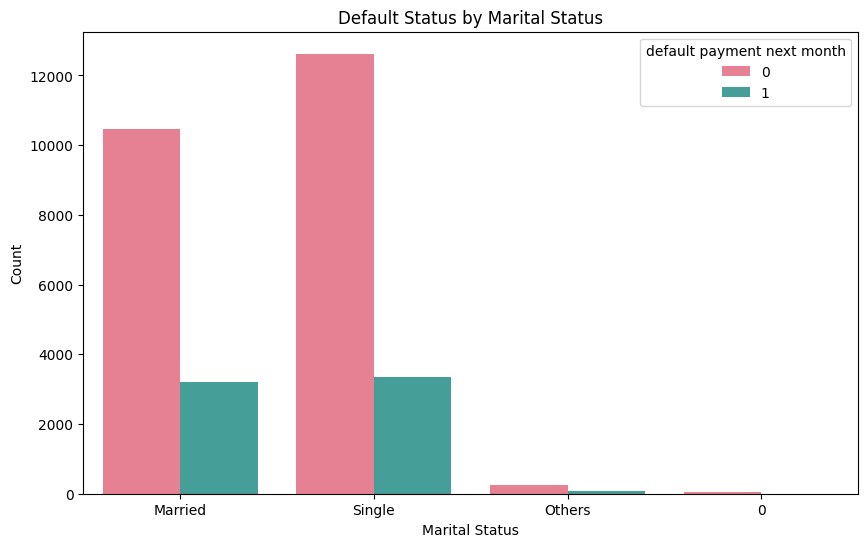

In [24]:
# Visual representation
plt.figure(figsize=(10, 6))
sns.countplot(x='MARRIAGE', hue='default payment next month', data=df, palette='husl')
plt.title('Default Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####12.**Repayment Ability by Education Level**: How does the education level of customers correlate with their repayment ability? Are customers with higher education levels less likely to default, indicating better financial literacy or stability?

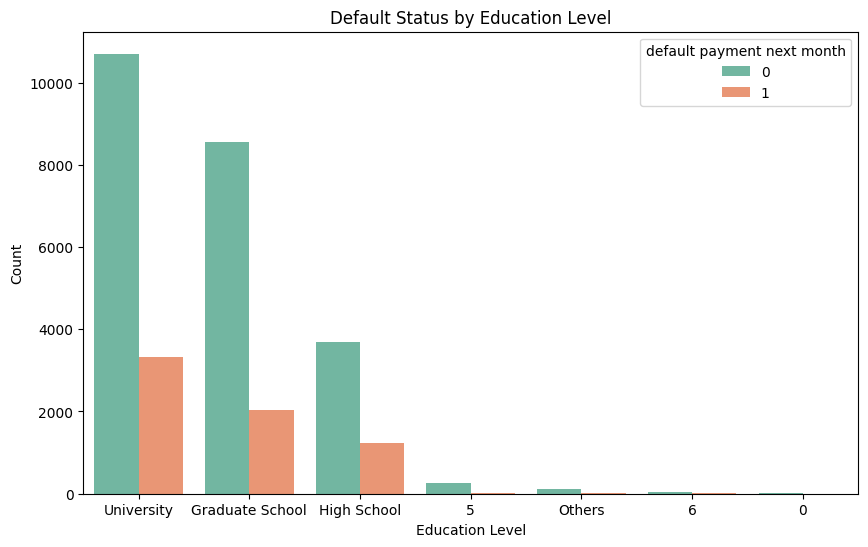

In [25]:
# Visual representation
plt.figure(figsize=(10, 6))
sns.countplot(x='EDUCATION', hue='default payment next month', data=df, palette='Set2')
plt.title('Default Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####13.**Age and Default Risk**: Is there a relationship between the age of customers and their likelihood of defaulting? Can we identify specific age groups that are more susceptible to default, indicating potential risk factors related to financial stability or life stage?

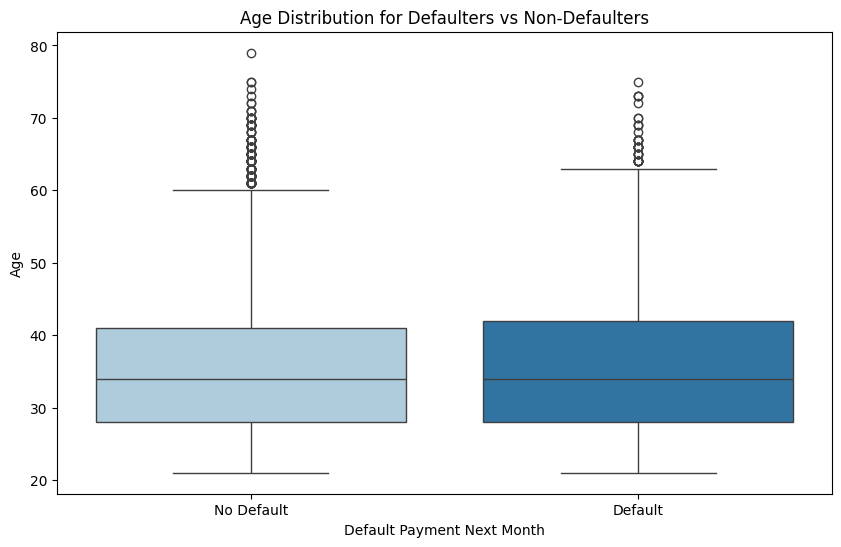

In [26]:
# Visual representation
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='AGE', data=df, palette='Paired')
plt.title('Age Distribution for Defaulters vs Non-Defaulters')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####14.**Portfolio Concentration Risk:** Assess the concentration risk in the credit portfolio by analyzing the distribution of credit limits, bill statement amounts, or default rates across different customer segments

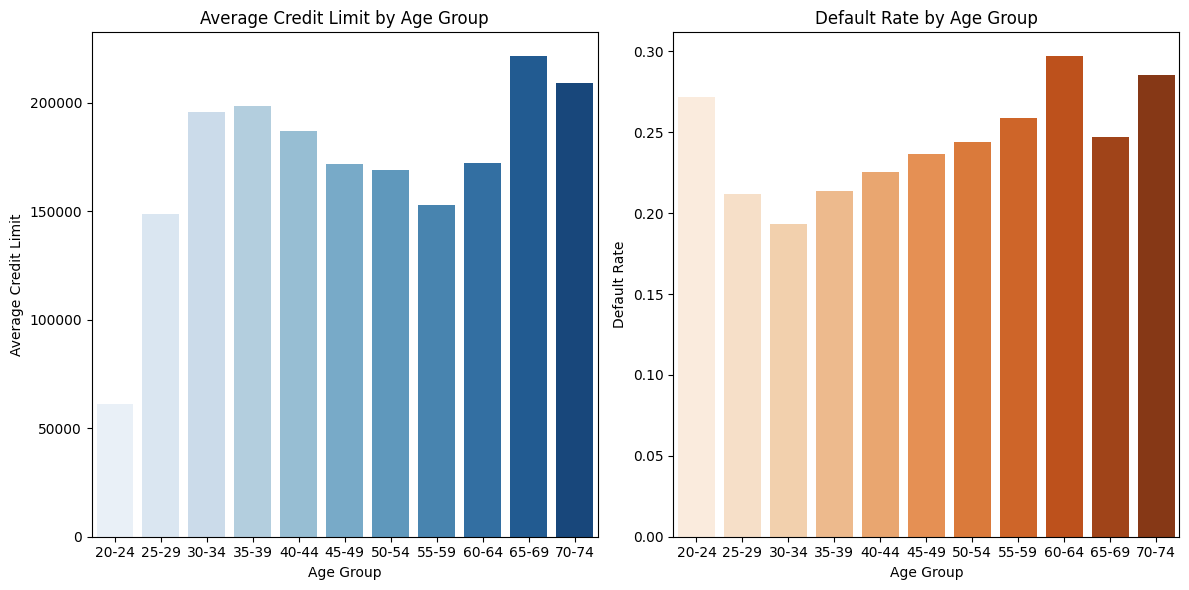

In [27]:
# Grouping data by age groups and calculating average credit limit and default rate for each group

# Create bins of 5 years in the age column
bins = np.arange(20, 80, 5)
labels = [f'{i}-{i+4}' for i in range(20, 75, 5)]  # Labels for age groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Grouping data by age groups and calculating average credit limit and default rate for each group
age_group_stats = df.groupby('AGE_GROUP').agg({'LIMIT_BAL': 'mean', 'default payment next month': 'mean'}).reset_index()
age_group_stats.rename(columns={'default payment next month': 'Default Rate'}, inplace=True)

# Visualizing portfolio concentration using bar charts
plt.figure(figsize=(12, 6))

# Plotting average credit limit
plt.subplot(1, 2, 1)
sns.barplot(x='AGE_GROUP', y='LIMIT_BAL', data=age_group_stats, palette='Blues')
plt.title('Average Credit Limit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Credit Limit')

# Plotting default rate
plt.subplot(1, 2, 2)
sns.barplot(x='AGE_GROUP', y='Default Rate', data=age_group_stats, palette='Oranges')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

####**15.Payment vs. Bill Amount Trends:** Analyze the relationship between bill statement amounts and payment amounts over time for customers who defaulted. Visualize this relationship using scatter plots or line plots to identify any trends or patterns in payment behavior that may indicate financial distress or default risk.

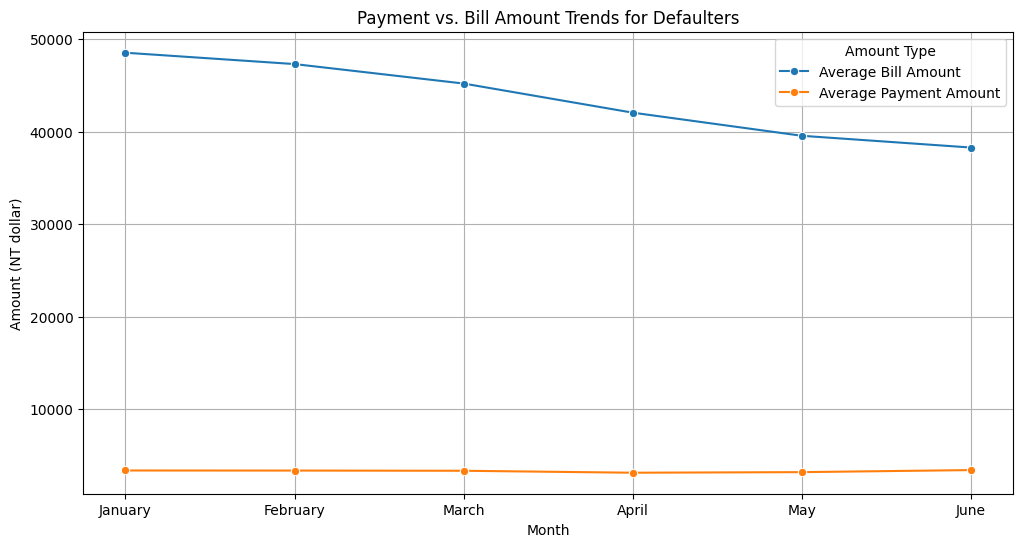

In [28]:
# Filter data to include only customers who defaulted
defaulters_data = df[df['default payment next month'] == 1]

# Select columns representing bill statement amounts and payment amounts
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a new dataframe with months and corresponding bill and payment amounts
payment_vs_bill_trends = pd.DataFrame({
    'Month': range(1, 7),
    'Average Bill Amount': defaulters_data[bill_cols].mean().values,
    'Average Payment Amount': defaulters_data[pay_cols].mean().values
})

# Melt the dataframe to have 'Month', 'Amount Type', and 'Amount' columns
payment_vs_bill_trends_melted = pd.melt(payment_vs_bill_trends, id_vars='Month', var_name='Amount Type', value_name='Amount')

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June']

# Visualize the relationship between bill statement amounts and payment amounts over time using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Amount', hue='Amount Type', data=payment_vs_bill_trends_melted, marker='o')
plt.title('Payment vs. Bill Amount Trends for Defaulters')
plt.xlabel('Month')
plt.ylabel('Amount (NT dollar)')
plt.xticks(payment_vs_bill_trends['Month'], month_names)  # Replace x-axis ticks with month names
plt.legend(title='Amount Type')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1
"There is a significant interaction effect between education level and marital status on default rates, and this effect varies across different age groups."

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):**
There is no significant interaction effect between education level and marital status on default rates, and this effect does not vary across different age groups.

**Alternative Hypothesis (H1):**
There is a significant interaction effect between education level and marital status on default rates, and this effect varies across different age groups.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Calculate mean bill amount and mean payment amount for defaulters
mean_bill_amount = defaulters_data[bill_cols].mean().mean()
mean_payment_amount = defaulters_data[pay_cols].mean().mean()

# Perform two-sample t-test to compare mean bill amount and mean payment amount
t_statistic, p_value = stats.ttest_ind(defaulters_data[bill_cols].mean(axis=1), defaulters_data[pay_cols].mean(axis=1))

# Print results
print("Mean Bill Amount:", mean_bill_amount)
print("Mean Payment Amount:", mean_payment_amount)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


Mean Bill Amount: 43470.49259091823
Mean Payment Amount: 3328.2156168374527
T-Statistic: 50.62884018317349
P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
There is no significant association between age group and default rates.

Alternative Hypothesis (H1):
There is a significant association between age group and default rates.

#### 2. Perform an appropriate statistical test.

In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table for default rates across age groups
age_default_cross_table = pd.crosstab(defaulters_data['AGE_GROUP'], defaulters_data['default payment next month'])

# Perform chi-square test for independence
chi2_statistic, p_value, dof, expected = chi2_contingency(age_default_cross_table)

# Print results
print("Chi-Square Statistic:", chi2_statistic)
print("P-Value:", p_value)


Chi-Square Statistic: 0.0
P-Value: 1.0


##### Which statistical test have you done to obtain P-Value?


I chose the chi-square test for independence for the third hypothetical statement because it is commonly used to analyze the relationship between two categorical variables. In this case, we are examining the association between age group (categorical) and default rates (also categorical).

Here's why the chi-square test is appropriate:

Type of Variables: Both age group and default rates are categorical variables. Age group is divided into discrete categories (e.g., 20-24, 25-29), and default rates are binary (1 for default, 0 for no default).

Research Question: The research question involves assessing whether there is a significant association between age group and default rates. The chi-square test for independence specifically addresses this type of relationship between categorical variables.

Assumption: The chi-square test does not assume normality of data and is suitable for analyzing nominal data.

Interpretation: The test provides a p-value that indicates the strength of evidence against the null hypothesis. A low p-value suggests that there is a significant association between the variables.

Given these factors, the chi-square test for independence is a suitable choice for testing the association between age group and default rates in the dataset.

##### Why did you choose the specific statistical test?

It seems that the chi-square test resulted in a p-value of 1.0, which means that there is insufficient evidence to reject the null hypothesis. In other words, we fail to find a significant association between age group and default rates.

This result suggests that, based on the data, there is no clear relationship between age group and default rates among the customers. It's important to note that this finding is specific to the dataset and may not generalize to other populations or contexts. Further analysis or additional data may be needed to better understand the factors influencing default rates among different age groups.







## ***6. Feature Engineering & Data Pre-processing***

###Categorical and Continous variables

In [31]:
#creating list of numerical and categorical columns
numerical_columns=['LIMIT_BAL', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_columns =  ['SEX', 'EDUCATION', 'MARRIAGE']

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
AGE_GROUP                     4
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

DataFrame does not contain any missing values

### 2. Handling Outliers

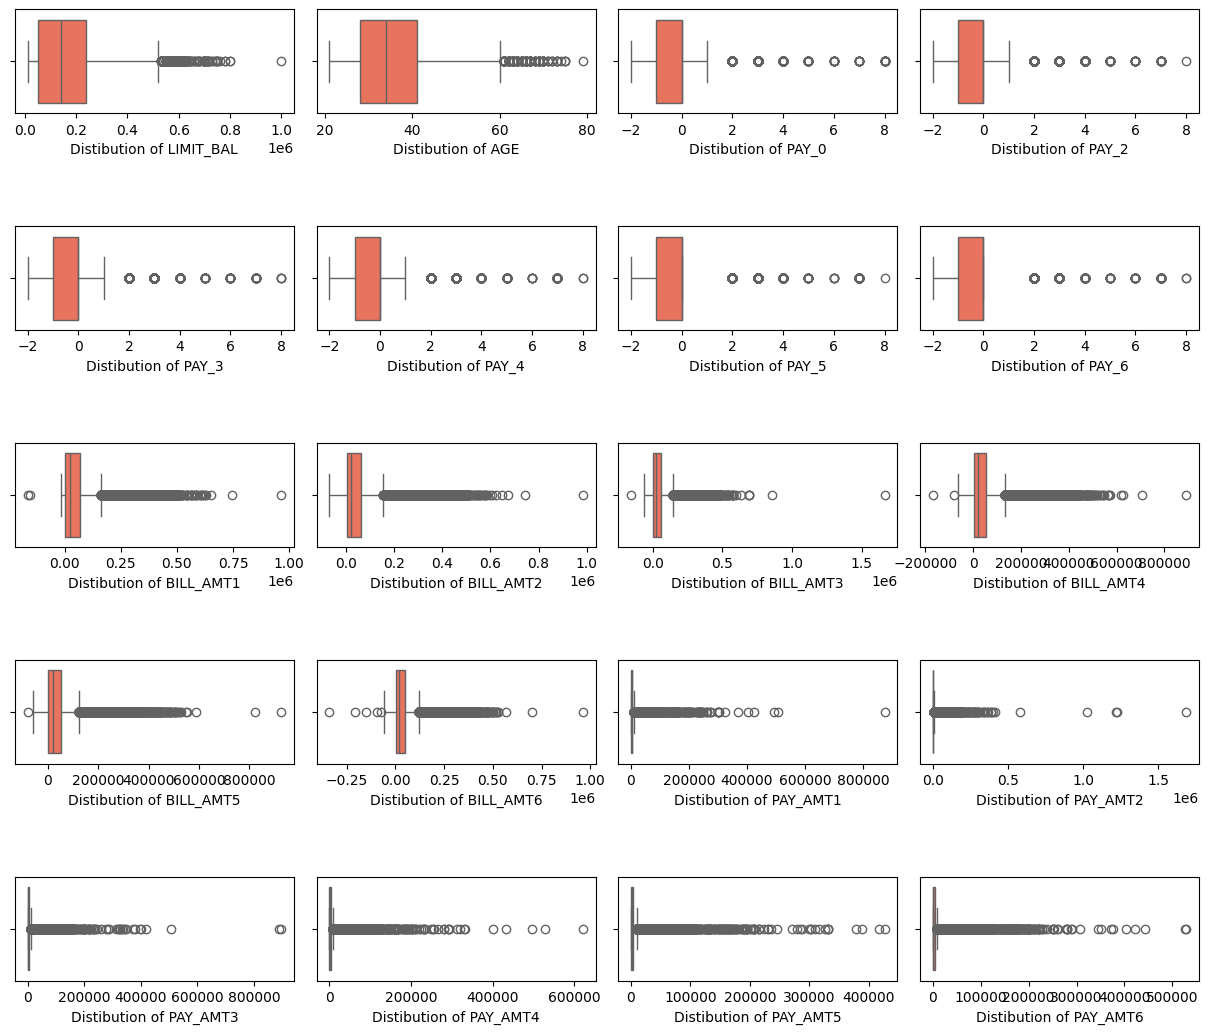

In [33]:
# Handling Outliers & Outlier treatments
#Checking for outliers

fig = plt.figure(figsize=(12,25))
c=1
for i in numerical_columns :
    plt.subplot(12, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are multiple outliers present as observed by the box plot, it is important to handle it accordingly. To handle the outliers, a technique called IQR (Inter quartile range) is used.

###Outlier Removal

In [34]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    #for column in data:
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (upr_bound):
            outliers.append(i)
    return outliers# Driver code


sample_outliers = detect_outliers_iqr(df["AGE"])


print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 

In [35]:
def outlier_remover(data, column):
    for col in column:
        tenth_percentile = np.percentile(data[col], 10)
        ninetieth_percentile = np.percentile(data[col], 90)
        data[col] = np.where(data[col] < tenth_percentile, tenth_percentile, data[col])
        data[col] = np.where(data[col] > ninetieth_percentile, ninetieth_percentile, data[col])
    return data

outlier_remover(df, numerical_columns)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE_GROUP
0,1,30000.0,Female,University,Married,25.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20-24
1,2,120000.0,Female,University,Single,26.0,-1.0,2.0,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,25-29
2,3,90000.0,Female,University,Single,34.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-34
3,4,50000.0,Female,University,Married,37.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,35-39
4,5,50000.0,Male,University,Married,49.0,-1.0,0.0,-1.0,0.0,...,19146.0,19131.0,2000.0,10401.1,10000.0,9000.0,689.0,679.0,0,55-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,Male,High School,Married,39.0,0.0,0.0,0.0,0.0,...,31237.0,15980.0,8500.0,10401.1,5003.0,3047.0,5000.0,1000.0,0,35-39
29996,29997,150000.0,Male,High School,Single,43.0,-1.0,-1.0,-1.0,-1.0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,40-44
29997,29998,30000.0,Male,University,Single,37.0,2.0,2.0,2.0,-1.0,...,20582.0,19357.0,0.0,0.0,10000.0,4200.0,2000.0,3100.0,1,35-39
29998,29999,80000.0,Male,High School,Married,41.0,1.0,-1.0,0.0,0.0,...,11855.0,48944.0,10300.0,3409.0,1178.0,1926.0,9500.0,1804.0,1,40-44


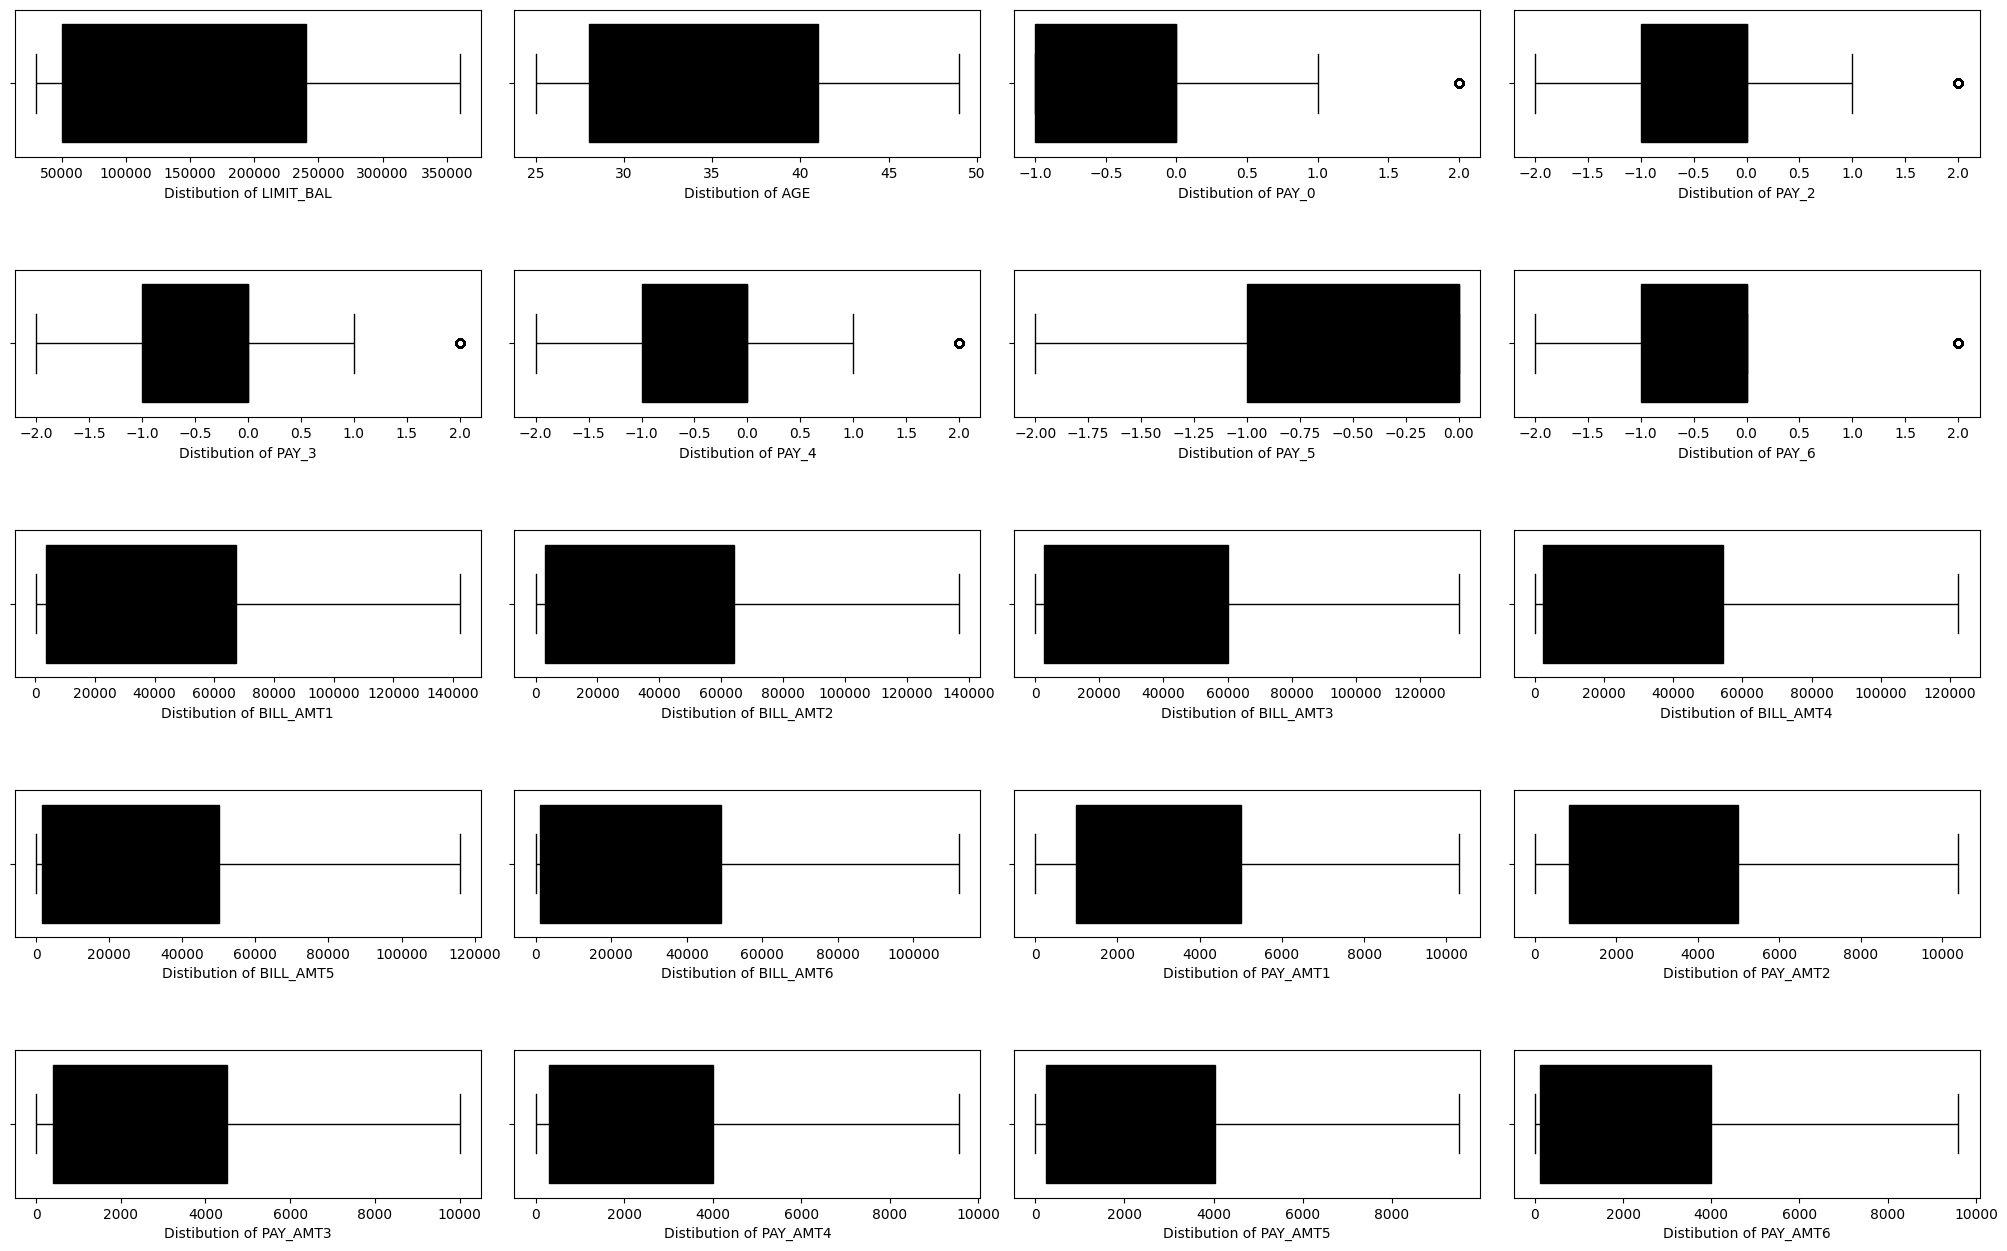

In [36]:
#Checking for outliers

fig = plt.figure(figsize=(20,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,color="black")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 3. Categorical Encoding

In [37]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'SEX' and 'EDUCATION' columns

# Perform one-hot encoding for the 'SEX' and 'EDUCATION' columns
df_encoded = pd.get_dummies(df, columns=['SEX', 'EDUCATION'])

# Display the encoded DataFrame
print(df_encoded.head())


#### What all categorical encoding techniques have you used & why did you use those techniques?

I've used the one-hot encoding technique. One-hot encoding transforms categorical variables into a binary format where each category is represented by a binary column (0 or 1). This technique is suitable when the categorical variables do not have ordinal relationships and when the number of unique categories is not excessively large. It creates new binary columns for each category, making it suitable for machine learning algorithms that require numerical input.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

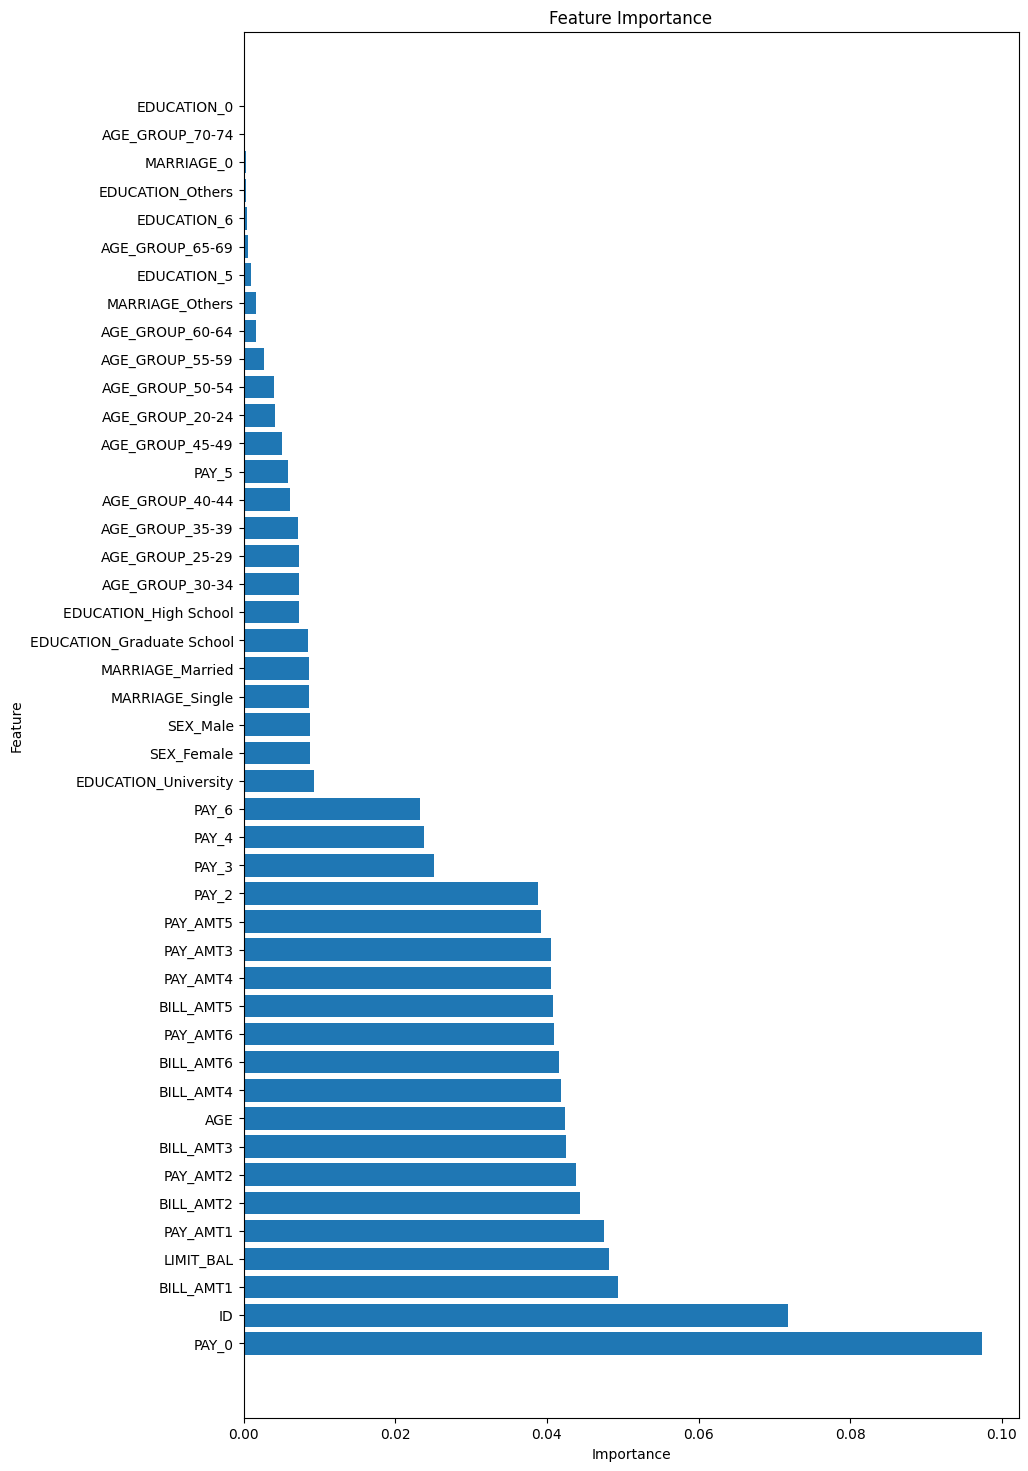

                      Feature  Importance
3                       PAY_0    0.097327
0                          ID    0.071839
9                   BILL_AMT1    0.049404
1                   LIMIT_BAL    0.048203
15                   PAY_AMT1    0.047527
10                  BILL_AMT2    0.044340
16                   PAY_AMT2    0.043858
11                  BILL_AMT3    0.042539
2                         AGE    0.042331
12                  BILL_AMT4    0.041893
14                  BILL_AMT6    0.041627
20                   PAY_AMT6    0.040942
13                  BILL_AMT5    0.040785
18                   PAY_AMT4    0.040573
17                   PAY_AMT3    0.040569
19                   PAY_AMT5    0.039225
4                       PAY_2    0.038867
5                       PAY_3    0.025151
6                       PAY_4    0.023831
8                       PAY_6    0.023216
29       EDUCATION_University    0.009239
21                 SEX_Female    0.008790
22                   SEX_Male    0

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame containing categorical variables
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP'])

# Separate features (X) and target variable (y)
X = df_encoded.drop('default payment next month', axis=1)
y = df['default payment next month']

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 18))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Printing the feature importances
print(feature_importances)


In [41]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [43]:

calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month']]])

,variables,VIF
0,ID,3.661668
1,LIMIT_BAL,4.883113
2,AGE,6.368338
3,PAY_0,1.699494
4,PAY_2,3.343597
5,PAY_3,4.147756
6,PAY_4,3.992158
7,PAY_5,4.312039
8,PAY_6,3.033309
9,BILL_AMT1,18.423890


In [44]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6']]])


,variables,VIF
0,ID,3.660426
1,LIMIT_BAL,4.882574
2,AGE,6.367435
3,PAY_0,1.699487
4,PAY_2,3.343281
5,PAY_3,4.147682
6,PAY_4,3.992154
7,PAY_5,4.288501
8,PAY_6,2.979351
9,BILL_AMT1,18.415798


In [45]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2']]])


,variables,VIF
0,ID,3.660409
1,LIMIT_BAL,4.878232
2,AGE,6.367411
3,PAY_0,1.698021
4,PAY_2,3.335872
5,PAY_3,4.147545
6,PAY_4,3.990331
7,PAY_5,4.288405
8,PAY_6,2.978492
9,BILL_AMT1,10.243038


In [46]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2', 'BILL_AMT4']]])


,variables,VIF
0,ID,3.648405
1,LIMIT_BAL,4.874512
2,AGE,6.367125
3,PAY_0,1.697426
4,PAY_2,3.333792
5,PAY_3,4.146811
6,PAY_4,3.979358
7,PAY_5,4.257740
8,PAY_6,2.971072
9,BILL_AMT1,10.232425


In [47]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2','BILL_AMT4','BILL_AMT3']]])


,variables,VIF
0,ID,3.647904
1,LIMIT_BAL,4.872930
2,AGE,6.366855
3,PAY_0,1.693708
4,PAY_2,3.323652
5,PAY_3,4.114763
6,PAY_4,3.979247
7,PAY_5,4.239824
8,PAY_6,2.961978
9,BILL_AMT1,6.229108


In [51]:
df_new = df[["LIMIT_BAL", "EDUCATION", "BILL_AMT1", "PAY_0","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', "default payment next month"]]


In [52]:
X = df_new.drop("default payment next month", axis = 1)
y = df_new["default payment next month"]

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [56]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_new[df_new['default payment next month']==0]
df_minority = df_new[df_new['default payment next month']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled['default payment next month'].value_counts()

0    23364
1    23364
Name: default payment next month, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Upsampling of the minority class to address class imbalance in your dataset. Here's a breakdown of each step:

Separate Majority and Minority Classes: The majority and minority classes are separated from the original DataFrame df_new.

Upsample Minority Class: The minority class is upsampled using the resample function from scikit-learn's utils. By setting replace=True, samples from the minority class are drawn with replacement to match the number of samples in the majority class. This step increases the number of instances in the minority class.

Combine Majority and Upsampled Minority Classes: The upsampled minority class is combined with the original majority class to create a new balanced DataFrame df_upsampled.

Display New Class Counts: The counts of the target variable default payment next month in the upsampled DataFrame are displayed to verify that the classes are now balanced.

#DataScaling

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X_transform = scaler.transform(X)

ValueError: could not convert string to float: 'Female'

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***